In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *


# <i class="fas fa-circle" style="color: #f0ad4e;"></i> PCA with SVD

In this exercise you will create recreate the basic PCA implementation from exercise $10.1$ but this time using by doing a singular value decomposition (SVD) of the data matrix. First, for convenience the excerise $10.1$ is posted again, Some of the code from that exercise will be used again throughout this exercise.  


## Implementing PCA

Your first task is to implement the PCA method as well as functions for
transforming to and from the space defined by the principal components.
But first, a quick recap of the terminology to minimize confusion.

Principal component analysis is about finding a linear transformation
that reduces the number of dimensions used to represent samples while
destroying as little of the variation as possible. PCA is defined by
$\Phi_{:k}$, an $M\times k$ matrix representing a linear transformation from
vectors in $M$-dimensional real space to $k$-dimensional latent space. We have the
following transformations

$$ 
b = \Phi_{:k}^\top x, 
$$

$$
x + \epsilon = \Phi_{:k} b,
$$

where
$x\in\mathbb{R}^M$ is the input vector and $b\in\mathbb{R}^K$ is the
embedded vector. As shown in the second equation, it is possible to reconstruct $x$ with some amount of error $\epsilon$. To find $\Phi$, we use the _eigenvectors_ of the covariance matrix of our data matrix $W$ where each row $i$ is a sample $x_i \in \mathbb{R}^M$. The eigenvectors are sorted by their associated eigenvalues which represent the variance of each dimension in latent space. Selecting the $k$ first columns (we use the notation $\Phi_{:k}$) results in a transformation that reduces the dimensionality of the latent space to $k$ dimensions. 


1.  <i class="fas fa-code"></i> **Implement PCA:** Create a function that calculates and returns the
    principle components of the shapes dataset. Use the method described
    above where the eigenvectors of the covariance matrix is used.


2.  <i class="fas fa-code"></i> **Implement transformations:** Create two functions, one for
    transforming from feature space to principal component space
    (eqaution {eq}`trans`) and one for transforming from principal
    component space to feature space
    (equation {eq}`inv`). You have to subtract the $\mu$ vector when
    transforming to the principal component space and add it again when
    transforming back to feature space. You may use the following
    modified equations for reference:

$$
b = \Phi_{:k}^\top(x-\mu)
$$  

$$
x = \Phi_{:k} b + \mu
$$

```{tip}
The reading material for the PCA lecture contains an excellent [tutorial](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html) on how this can be done, but remember that copying is not allowed!!
```

```{tip}
Some of the later tasks will be easier if you return all 146 principle components. You can then create another function for extracting $n$ components to generate $\Phi$.
```

## Implementing PCA with SVD 

This exercise serves as an extension to the previous PCA exercise but this time using SVD instead of an explicit eigenvalue decomposition. Recall that an eigenvalue decomp and SVD are equivalent under certain conditions. This means that only the `get_principle_components` function needs to be changed in the notebook.

Inspect the covariance matrix $C$ of the shape data (same as in exercise 10.1) given by:

$$C = \frac{W^\top W}{n-1} $$
when the data ($W$) is centered, and where $n$ is the number of data samples. 

Usually we would find the eigen-values and -vectors of $C$ by doing an eigenvalue decomposition (diagonalizing $C$). But instead we can use that $W$ can be expressed as 

$$W = U D V^\top$$

If we insert that into the equation for the covariance matrix we get:

$$C = \frac{V D^\top U^\top U D V^\top}{n-1} = V\frac{D^2}{n-1}V^\top = V \Lambda V^\top  $$

One can then se that this exactly matches eigenvalue decomposition where $\Lambda$ contains the eigenvalues, and $V$ is the eigenvectors. 

<i class="fas fa-code"></i> Inspect $\Lambda$ and show that they are identical to the eigenvalues calculated in week 10 (exercise 10.1).

<i class="fas fa-code"></i> Show that the vectors $V$ are equivalent to the eigenvectors calculated in week 10 (exercise 10.1).

<i class="fas fa-code"></i> Use the formula shown above and SVD to determine the principle components in the function `get_principle_components`.


In [2]:
# Write your implementation here.


In [3]:
#Load data
path = './db'
shapes, images = face_shape_data(path)

# Write your implementation here.


120


## Test of PCA (equivalent to week 10)
The rest of the exercise is identical from last week and only serve to test the PCA implementation. If you have solved the exercise last week, just copy paste your code. Otherwise, now is an exellent chance to catch up!


## Evaluating precision

As described above, using PCA to transform a sample $x$ to a principal
component space and back again likely results in an error $\epsilon$, called the _reconstruction error_. In this task you will implement a
method for calculating this error and use it to test the effect of
increasing or decreasing the number of principal components used.

When solving regression problems, the error is typically measured as the
average distance error, otherwise known as root mean square error
(RMSE). This is also used when calculating the construction error. For
reference, the RMSE is

$$RMSE(x, \widetilde{x}) = \sqrt{\frac{1}{N}\sum_i (x_i-\widetilde{x}_i)^2},$$

where $x$, $\widetilde{x}$ are the original and transformed samples
respectively and $N$ is the total number of samples $x_i$.

Another method for evaluating PCA models is to look at the eigenvalues,
where eigenvalue $i$ is denoted $\lambda^{(i)}$. The eigenvalues explain
the variance of each dimension when that data has been transformed by
PCA. The sum of all eigenvalues $\lambda^{(1)}+\dots+\lambda^{(n)}$ is
equal to the total variance of the data. By comparing all the
eigenvalues we can calculate:

(1) **Proportional variance:** What proportion of the total variance is
explained by a single component. The following formula can be used

$$\frac{\lambda^{(i)}}{\lambda^{(1)} + \dots + \lambda^{(n)}}$$

(2) **Cumulative proportional variance:** What cumulative proportion of
the total variance is explained by the first $k$ components.

$$\frac{\lambda^{(1)} + \dots + \lambda^{(k)}}{\lambda^{(1)} + \dots + \lambda^{(n)}}$$


1.  **<i class="fas fa-code"></i> Calculate reconstruction error:** Implement a function in your
    script that calculates the reconstruction error given a dataset $X$,
    principle components $\Phi$, and a mean vector $\mu$.

2.  **<i class="fas fa-code"></i> Plot reconstruction error:** When constructing $\Phi$ you may use a single principal component or all of them. Plot the reconstruction error of $\Phi$ for all possible numbers of principle components. An example is shown in {numref}`fig:plot_var`.

3.  **<i class="fas fa-code"></i> Calculate variance:** Create functions that calculate the
    _proportional_ and _cumulative proportional_ variance.

4.  **<i class="fas fa-code"></i> Plot variance metrics:** Plot both the proportional and cumulative
    proportional variance in a single plot. An example is shown in
    {numref}`fig:plot_var`.


```{figure} ./img/plot_var.png
---
name: fig:plot_var
width: 400px
---
The expected result of the cumulative and individual variance
proportion.
```


In [19]:
# Write your implementation here. reconstruction error, 


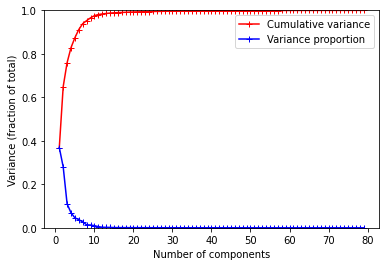

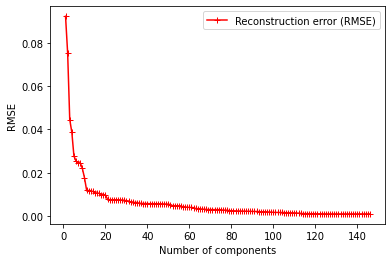

In [20]:
# Write your implementation here.


<i class="fas fa-question"></i> Does the PCA done through SVD produce equvivalent results to the eigenvalue decomposition procedure in week 10?
